In [98]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [58]:
df = pd.read_csv("Video Games Sales.csv")

In [59]:
df = df.drop("index", axis = 1)

In [60]:
df.shape

(1907, 12)

In [61]:
df.isna().sum()

Rank              0
Game Title        0
Platform          0
Year             29
Genre             0
Publisher         2
North America     0
Europe            0
Japan             0
Rest of World     0
Global            0
Review            0
dtype: int64

In [62]:
df.dropna()

,Rank,Game Title,Platform,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global,Review
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,40.43,28.39,3.77,8.54,81.12,76.28
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,91.00
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,14.50,12.22,3.63,3.21,33.55,82.07
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,14.82,10.51,3.18,3.01,31.52,82.65
4,5,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,88.00
...,...,...,...,...,...,...,...,...,...,...,...,...
1902,1903,Lizzie McGuire 2: Lizzie Diaries,GBA,2004.0,Action,Disney Interactive Studios,0.60,0.22,0.00,0.01,0.83,55.00
1903,1904,Xenoblade Chronicles,Wii,2010.0,Role-Playing,Nintendo,0.39,0.22,0.16,0.07,0.83,91.74
1904,1905,SingStar Abba,PS3,2008.0,Misc,Sony Computer Entertainment,0.25,0.44,0.00,0.14,0.83,73.00
1905,1906,FIFA Soccer World Championship,PS2,2000.0,Sports,Electronic Arts,0.27,0.21,0.28,0.07,0.83,73.00


In [64]:
df.groupby("Genre").mean()

<ipython-input-64-cb973a57e182>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby("Genre").mean()


,Rank,Year,North America,Europe,Japan,Rest of World,Global,Review
Genre,,,,,,,,
Action,930.123636,2005.113971,1.166836,0.748764,0.166036,0.235891,2.317345,78.953709
Adventure,929.490909,2004.285714,1.062091,0.698909,0.245545,0.170909,2.176818,81.480182
Fighting,988.333333,2002.616000,1.056111,0.503889,0.269921,0.146349,1.976190,82.208651
Misc,913.056604,2005.405229,1.292201,0.826918,0.319371,0.241195,2.680000,72.769874
Platform,878.212766,2000.774194,1.686330,0.742234,0.554096,0.183085,3.166170,78.384202
Puzzle,963.795455,1999.545455,1.380000,0.422273,0.568182,0.098864,2.469318,74.306818
Racing,1011.252688,2002.755435,1.152419,0.815161,0.235430,0.226237,2.429032,78.105376
Role-Playing,851.329480,2003.742690,1.141850,0.583237,0.978728,0.164913,2.868208,83.913410
Shooter,923.737864,2005.700980,1.618447,0.756748,0.069029,0.261359,2.704854,81.079806


<ipython-input-78-9708c64179ac>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_df = df.groupby("Genre").mean().sort_values("Review", ascending=False)


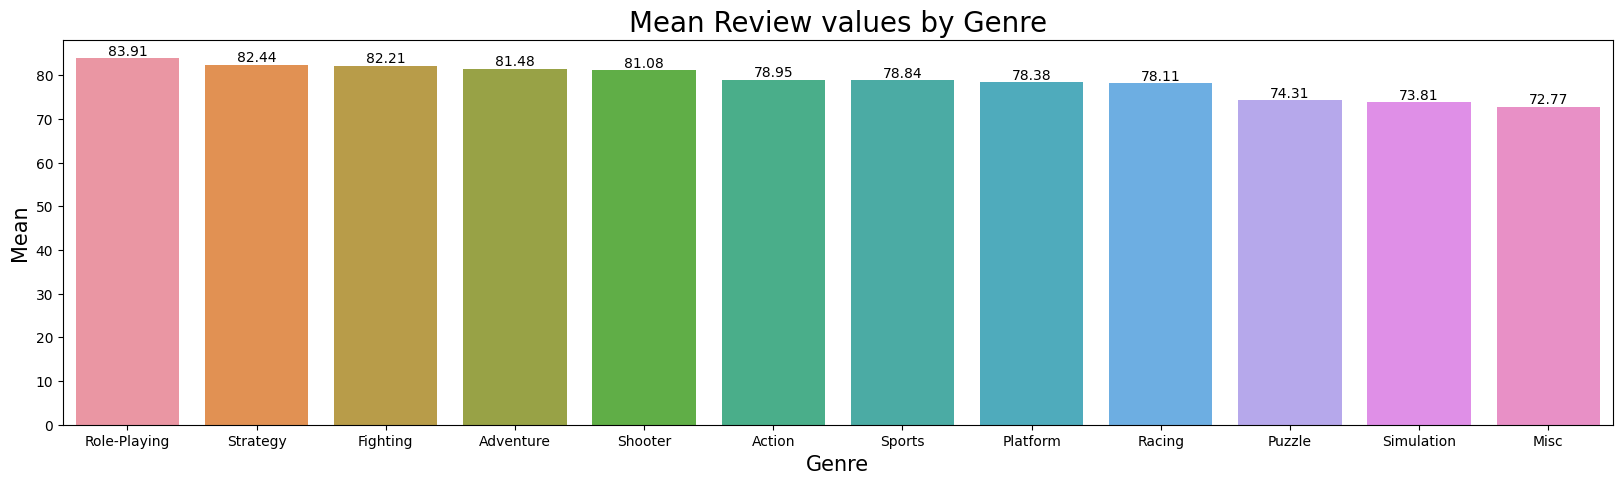

In [78]:
grouped_df = df.groupby("Genre").mean().sort_values("Review", ascending=False)


plt.figure(figsize=(20, 5))
ax = sns.barplot(x=grouped_df.index, y=grouped_df['Review'])
for i, v in enumerate(grouped_df['Review']):
    ax.text(i, v + 0.01, str(round(v, 2)), ha='center', va='bottom', fontsize=10)
plt.xlabel('Genre', fontsize=15)
plt.ylabel('Mean', fontsize=15)
plt.title('Mean Review values by Genre', fontsize=20)
plt.show()

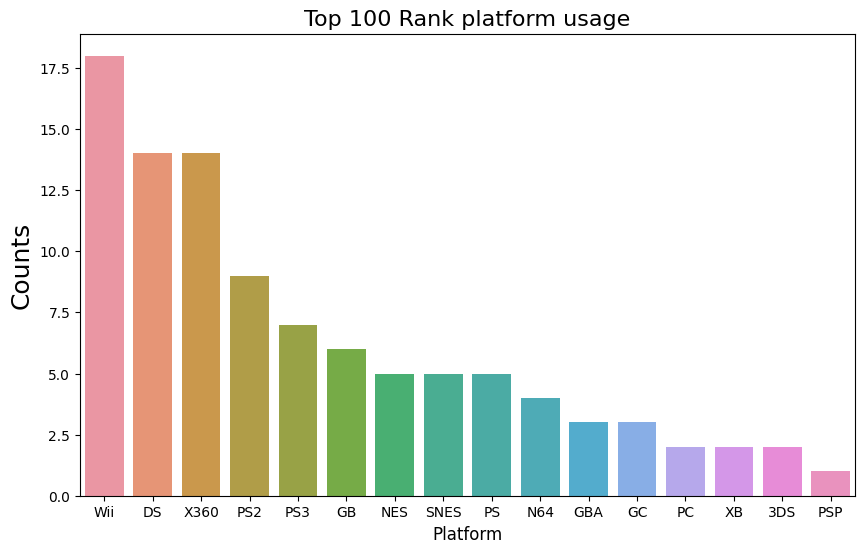

In [122]:
value_counts = df.head(100)["Platform"].value_counts()
df_value_counts = pd.DataFrame({'Platform': value_counts.index, 'Counts': value_counts.values})
plt.figure(figsize=(10, 6))
sns.barplot(x='Platform', y='Counts', data=df_value_counts)
plt.xlabel('Platform', fontsize=12)
plt.ylabel('Counts', fontsize=18)
plt.title('Top 100 Rank platform usage', fontsize=16)
plt.show()

In [84]:
df.head(100)[[ 'North America', 'Europe', 'Japan', 'Rest of World', 'Global',
       'Review']].mean()

North America     6.6298
Europe            3.6819
Japan             1.8686
Rest of World     1.0236
Global           13.2036
Review           86.4351
dtype: float64

In [86]:
df["Game Title"].value_counts()

LEGO Batman: The Videogame                     6
FIFA Soccer 08                                 6
LEGO Indiana Jones: The Original Adventures    6
WWE SmackDown vs Raw 2008                      5
Pro Evolution Soccer 2008                      5
                                              ..
Star Wars: Dark Forces                         1
The 7th Guest                                  1
Crash Nitro Kart                               1
Scribblenauts                                  1
FIFA Soccer World Championship                 1
Name: Game Title, Length: 1519, dtype: int64

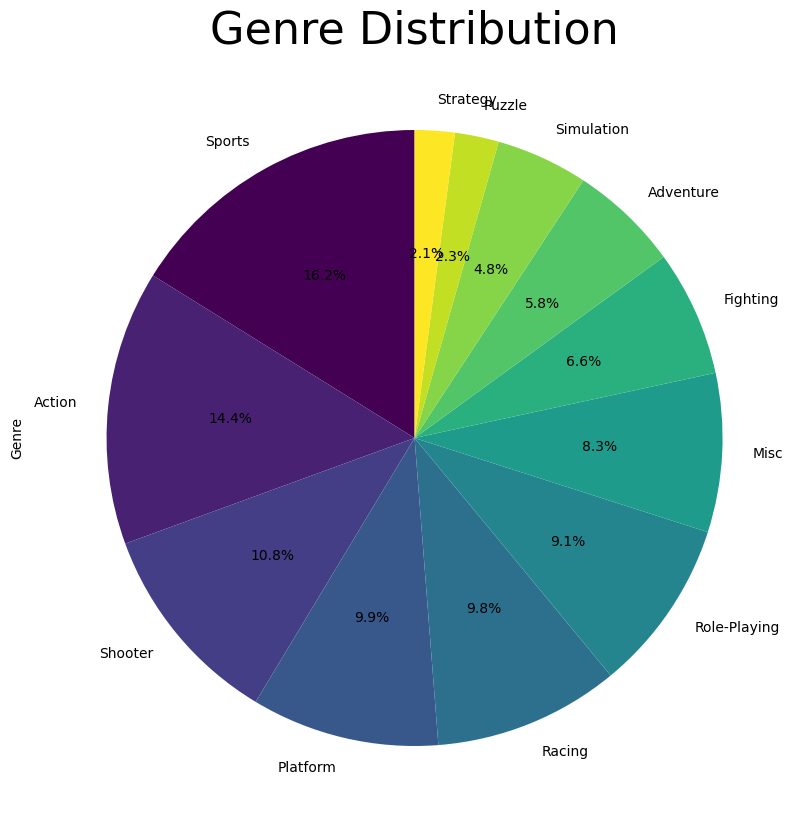

In [96]:
plt.figure(figsize=(10, 10))
df["Genre"].value_counts().plot(kind="pie", autopct='%1.1f%%', startangle=90, cmap='viridis')

plt.title('Genre Distribution', fontsize=32)

plt.show()

<Axes: >

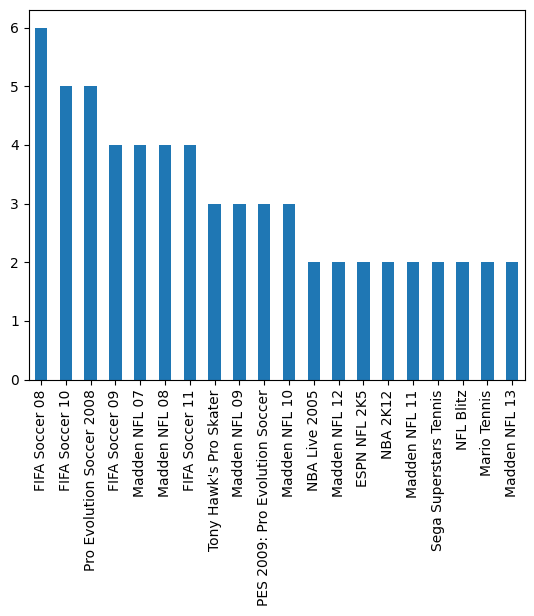

In [130]:
df[df["Genre"] =="Sports"]["Game Title"].value_counts().head(20).plot(kind = "bar")


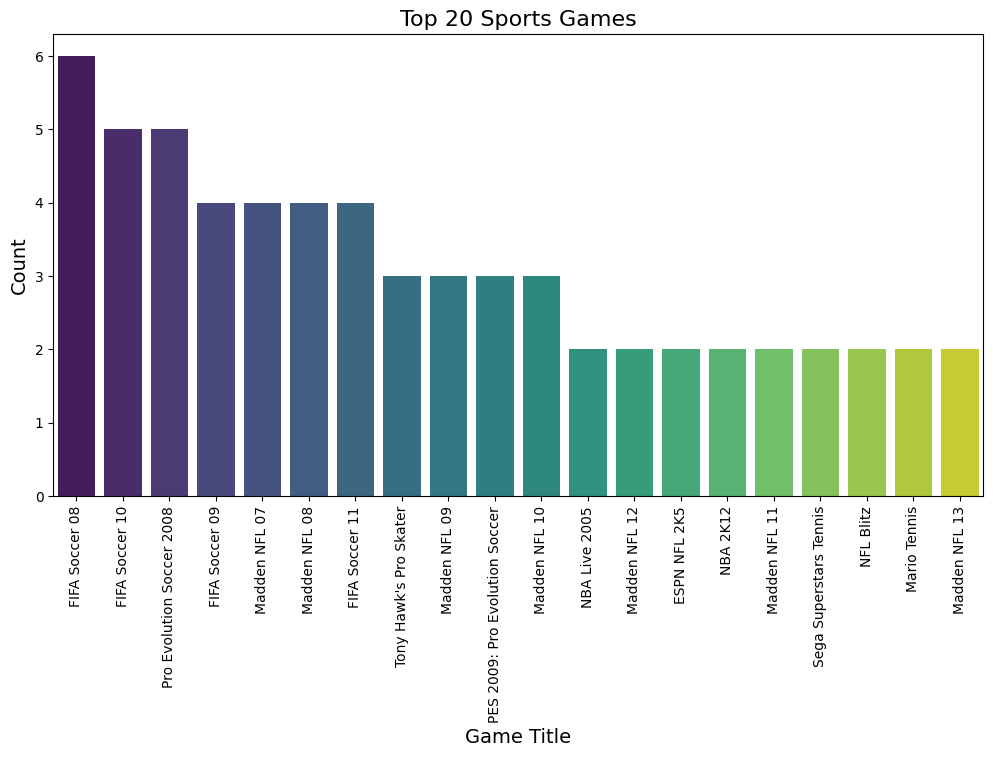

In [131]:
sports_game_counts = df[df["Genre"] == "Sports"]["Game Title"].value_counts().head(20)
plt.figure(figsize=(12, 6))
sns.barplot(x=sports_game_counts.index, y=sports_game_counts.values, palette="viridis")
plt.xlabel('Game Title', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Top 20 Sports Games', fontsize=16)
plt.xticks(rotation=90)
plt.show()

In [105]:
# label_encoder = LabelEncoder()
# df['en_Game_Title'] = label_encoder.fit_transform(df['Game Title'])
# df['en_Platform'] = label_encoder.fit_transform(df['Platform'])

<ipython-input-106-e3ff58b5c11f>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


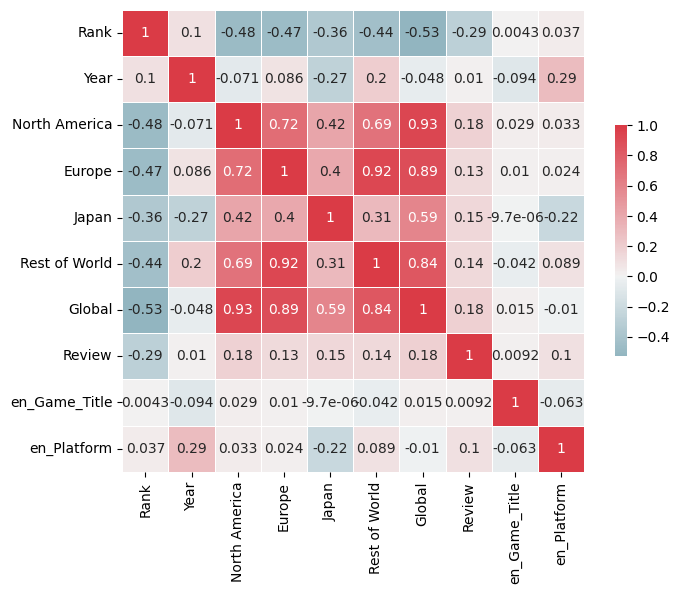

In [106]:
corr = df.corr()
f, ax = plt.subplots(figsize=(8, 6))

cmap = sns.diverging_palette(220, 10, as_cmap=True)


sns.heatmap(corr, cmap=cmap, vmax=1, center=0, annot=True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.show()

<ipython-input-115-83eef1ea1050>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean_review_by_year = df.groupby("Year").mean()['Review']


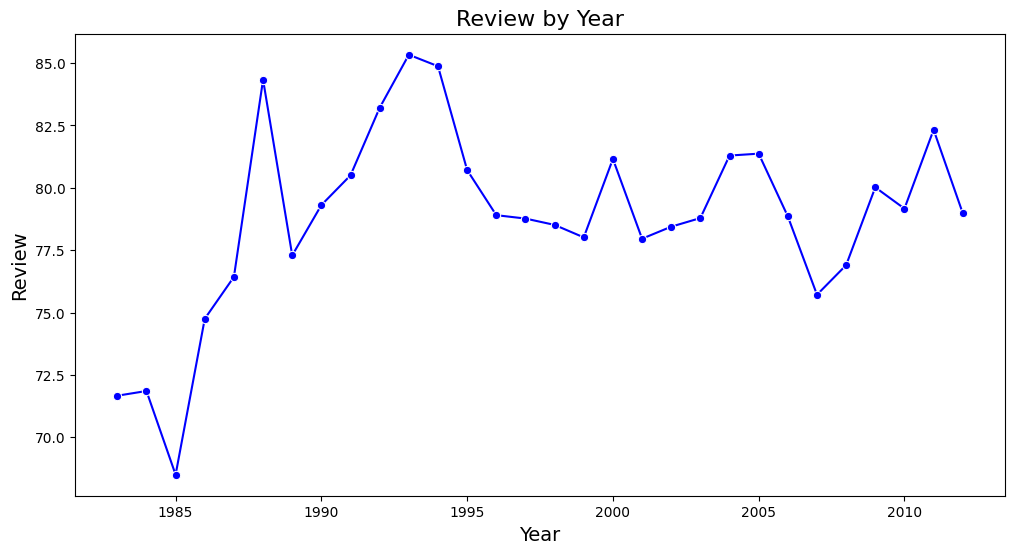

In [115]:
mean_review_by_year = df.groupby("Year").mean()['Review']
plt.figure(figsize=(12, 6))
sns.lineplot(data=mean_review_by_year, marker='o', color='b')
plt.xlabel('Year', fontsize=14)
plt.ylabel('Review', fontsize=14)
plt.title('Review by Year', fontsize=16)
plt.show()

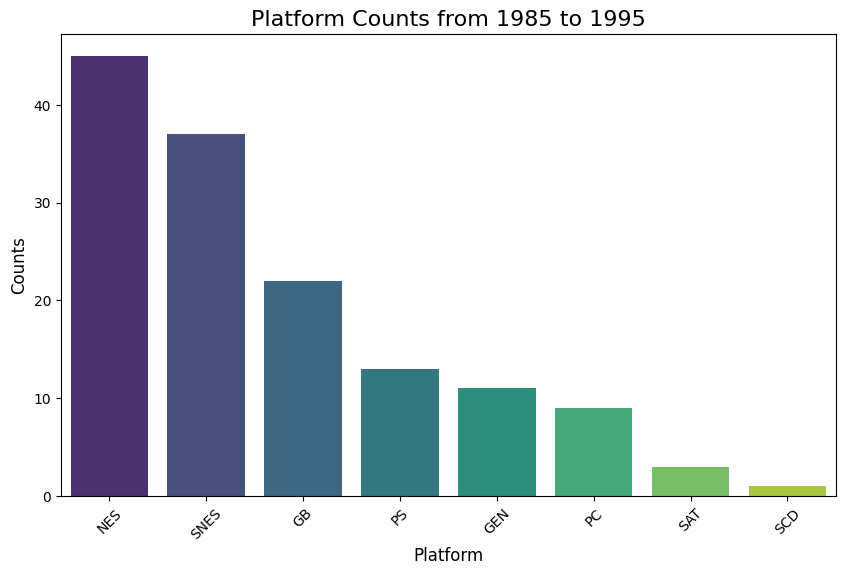

In [154]:
filtered_df = df[(df['Year'] >= 1985) & (df['Year'] <= 1995)]["Platform"].value_counts().reset_index()

filtered_df.columns = ['Platform', 'Counts']

plt.figure(figsize=(10, 6))
sns.barplot(x='Platform', y='Counts', data=filtered_df, palette='viridis')

plt.xlabel('Platform', fontsize=12)
plt.ylabel('Counts', fontsize=12)
plt.title('Platform Counts from 1985 to 1995', fontsize=16)
plt.xticks(rotation=45)
plt.show()

In [155]:
def plot_density_curve(dataframe, column_name):
    plt.figure(figsize=(8, 6))
    sns.kdeplot(data=dataframe[column_name], fill=True, color='skyblue', alpha=0.8)
    plt.xlabel(column_name, fontsize=12)
    plt.ylabel('Density', fontsize=12)
    plt.title('Density Curve for {}'.format(column_name), fontsize=16)
    plt.show()

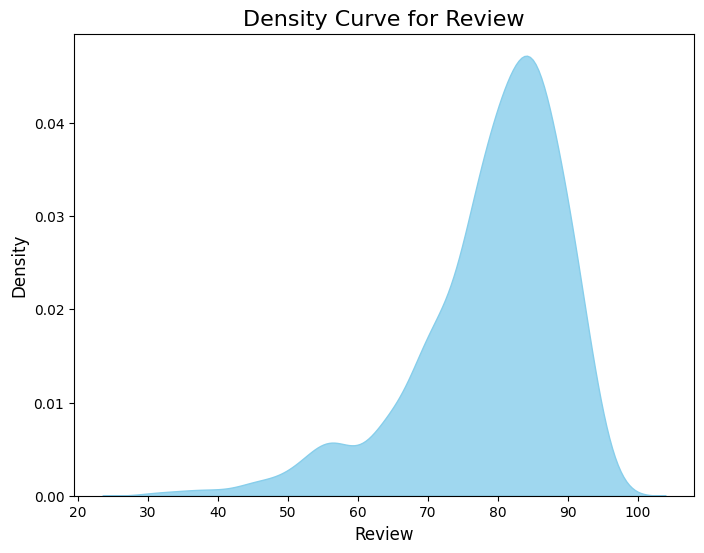

In [158]:
plot_density_curve(df, "Review")

In [159]:
df

,Rank,Game Title,Platform,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global,Review,en_Game_Title,en_Platform
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,40.43,28.39,3.77,8.54,81.12,76.28,1456,18
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,91.00,1193,8
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,14.50,12.22,3.63,3.21,33.55,82.07,630,18
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,14.82,10.51,3.18,3.01,31.52,82.65,1457,18
4,5,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,88.00,1254,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1902,1903,Lizzie McGuire 2: Lizzie Diaries,GBA,2004.0,Action,Disney Interactive Studios,0.60,0.22,0.00,0.01,0.83,55.00,574,4
1903,1904,Xenoblade Chronicles,Wii,2010.0,Role-Playing,Nintendo,0.39,0.22,0.16,0.07,0.83,91.74,1483,18
1904,1905,SingStar Abba,PS3,2008.0,Misc,Sony Computer Entertainment,0.25,0.44,0.00,0.14,0.83,73.00,1066,12
1905,1906,FIFA Soccer World Championship,PS2,2000.0,Sports,Electronic Arts,0.27,0.21,0.28,0.07,0.83,73.00,311,11


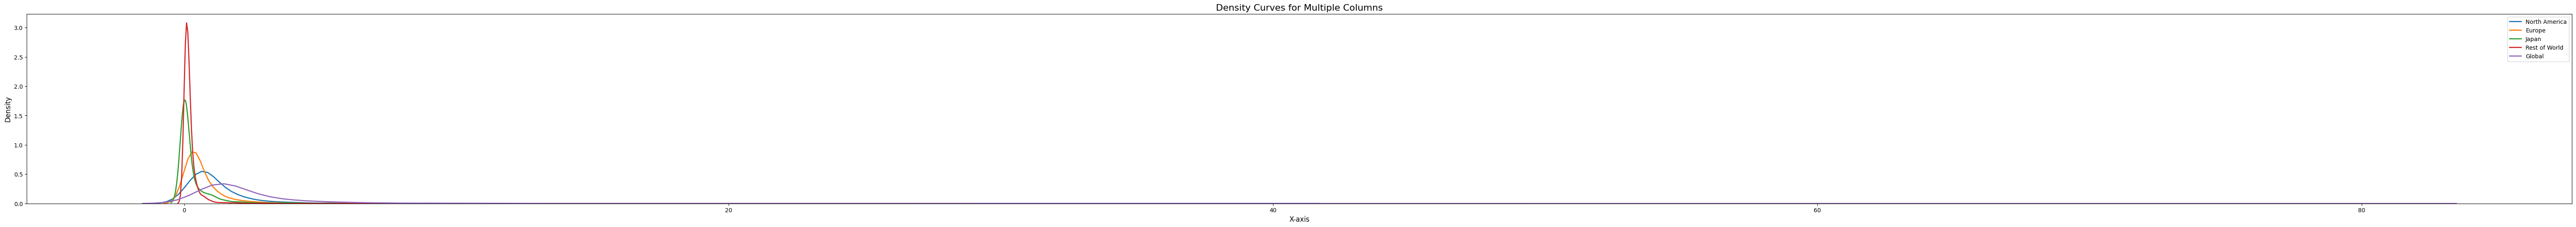

In [165]:
colx = [
       'North America', 'Europe', 'Japan', 'Rest of World', 'Global']


plt.figure(figsize=(80, 6))
for column in colx:
    sns.kdeplot(data=df[column], label=column, linewidth=2)

# Adding labels and title
plt.xlabel('X-axis', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.title('Density Curves for Multiple Columns', fontsize=16)

# Displaying the plot
plt.legend()
plt.show()